## How well do jobs and skills pay for Data Analysts?
Methodology : 
1. Evaluate median salary for top 3 data jobs 
2. Find median salary per skill for Data Analysts : Globally and in India
3. Visualize for highest paying skills and most demanded skills for Data Analyst


In [13]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
# Load the dataset
dataset=load_dataset("lukebarousse/data_jobs")
df= pd.DataFrame(dataset['train'])
#creating a copy of the original dataset so it stays uneffected
df1=df.copy()
#datetime filtering 
df1['job_posted_date']=pd.to_datetime(df1['job_posted_date'])
#seperating the month
df1['month']=df1['job_posted_date'].dt.month
#writing a function to convert the job_skills column from strings to lists
def clean_list(job_skills):
    if pd.notna(job_skills):
        return ast.literal_eval(job_skills)
    else:
        return job_skills
    
df1['job_skills']=df1['job_skills'].apply(clean_list)

In [14]:
# seperating the data for india 
df_india=df1[df1['job_country']=='India']

#the top 3 roles
top3_roles=df1['job_title_short'].value_counts().head(3)

#filtering the data for top 3 roles itself 

#globally
df1=df1[df1['job_title_short'].isin(top3_roles.index)]
df_india=df_india[df_india['job_title_short'].isin(top3_roles.index)]

In [44]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_19272\2813313618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='salary_year_avg', y='job_title_short', order=top3_roles.index, ax=ax[0], palette='dark:y')
C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_19272\2813313618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_india, x='salary_year_avg', y='job_title_short',order=top3_roles.index, ax=ax[1], palette='dark:y')


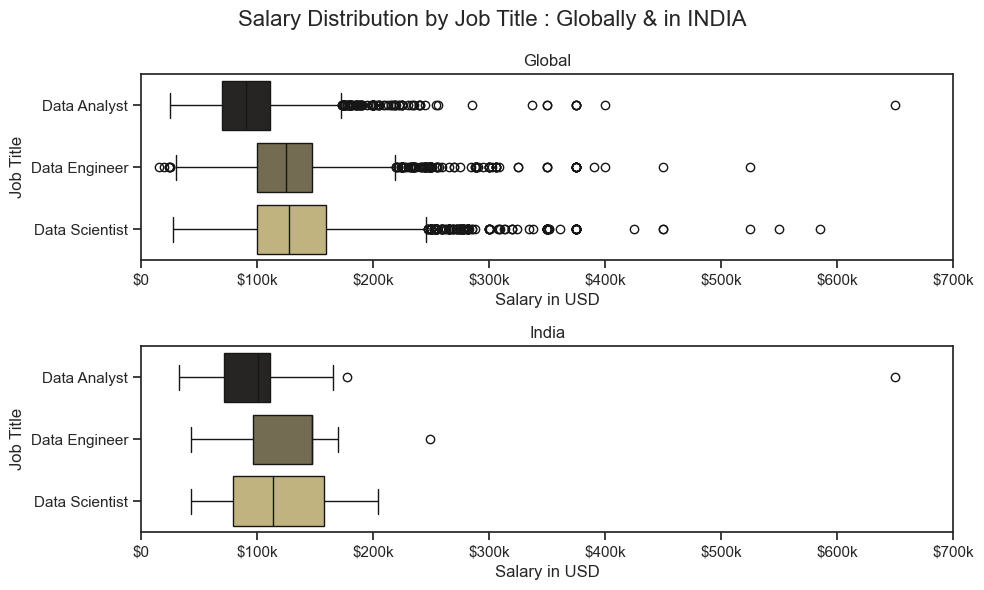

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))

#plotting the boxplot for the global level first 
sns.boxplot(data=df1, x='salary_year_avg', y='job_title_short', order=top3_roles.index, ax=ax[0], palette='dark:y')
ax[0].set_title('Global')
ax[0].set_xlabel("Salary in USD")
ax[0].set_ylabel('Job Title')
ax[0].set_xlim(0, 700_000)

#plotting the boxplot for India
sns.boxplot(data=df_india, x='salary_year_avg', y='job_title_short',order=top3_roles.index, ax=ax[1], palette='dark:y')
ax[1].set_title('India')
ax[1].set_xlabel("Salary in USD")
ax[1].set_ylabel('Job Title')
ax[1].set_xlim(0, 700_000)

def format_x_axis(x, pos):
    if x >= 1000:
        return f"${x/1000:.0f}k"
    else:
        return f"${x:.0f}"

# Apply the formatter to both subplots
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis))
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis))

# Layout so plots do not overlap

fig.suptitle('Salary Distribution by Job Title : Globally & in INDIA', fontsize=16)
fig.tight_layout()
# Show the plot
plt.show()

#### Analysing top demanded skills and top paying skills for Data Analysts


In [50]:
# Explode the 'job_skills' column to create separate rows for each skill
df1 = df1.explode('job_skills')

# Filter the dataframe to only include rows where the job title is 'Data Analyst'
df1 = df1[df1['job_title_short'] == 'Data Analyst'].copy()

# Group the dataframe by 'job_skills' and calculate the median salary and count of each skill
skill_sets = df1.groupby('job_skills')['salary_year_avg'].agg(['median', 'count'])

# Get the top 10 skills in demand (by count) and sort them by median salary in descending order
top_demand_skills = skill_sets.sort_values(by='count', ascending=False).head(10)
top_demand_skills = top_demand_skills.sort_values(by='median', ascending=False)

# Get the top 10 paying skills (by median salary)
top_paying_skills = skill_sets.sort_values(by='median', ascending=False).head(10)

In [51]:
top_demand_skills

,median,count
job_skills,,
python,98500.0,1838
tableau,95000.0,1657
r,92527.5,1073
sql,92500.0,3079
sql server,92150.0,336
power bi,90000.0,1042
sas,90000.0,1006
powerpoint,85000.0,518
excel,84479.0,2135


In [52]:
top_paying_skills

,median,count
job_skills,,
svn,400000.0,1
solidity,179000.0,1
dplyr,167500.0,3
gitlab,163782.0,7
terraform,163782.0,3
couchbase,160515.0,1
datarobot,155485.5,1
golang,155000.0,2
mxnet,149000.0,2


C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_19272\2702036703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_demand_skills, x='median', y='job_skills', palette='light:r_r', ax=axs[0])
C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_19272\2702036703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_paying_skills, x='median', y='job_skills', palette='dark:r', ax=axs[1])


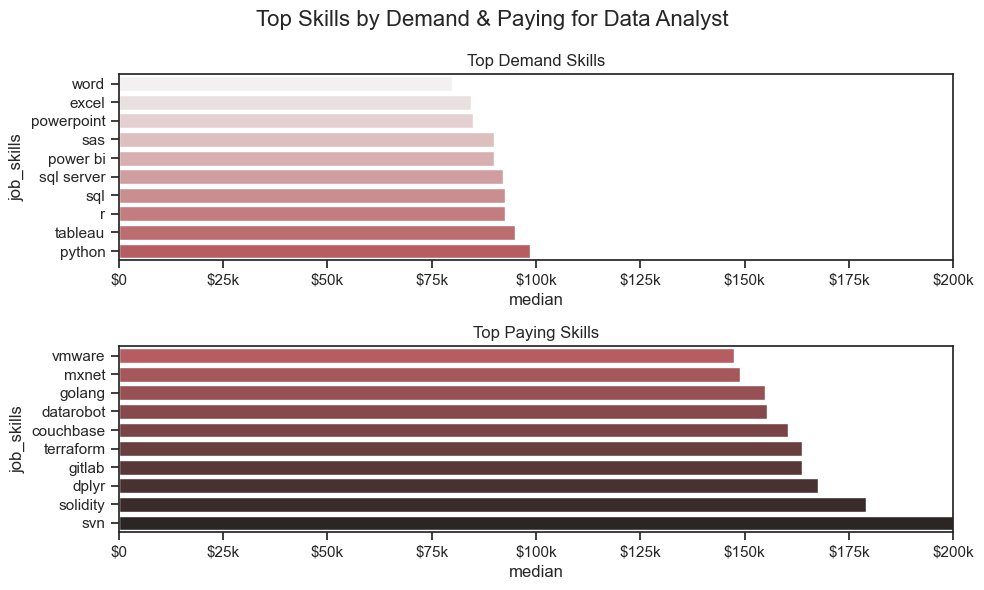

In [56]:
# Create a figure with two subplots, one on top of the other
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the top demand skills as a horizontal bar chart using seaborn
sns.barplot(data=top_demand_skills, x='median', y='job_skills', palette='light:r_r', ax=axs[0])

# Plot the top paying skills as a horizontal bar chart using seaborn
sns.barplot(data=top_paying_skills, x='median', y='job_skills', palette='dark:r', ax=axs[1])

# Invert the y-axis for both plots to make the skills appear in the correct order
axs[0].invert_yaxis()
axs[1].invert_yaxis()

# Set the title for each plot
axs[0].set_title('Top Demand Skills')
axs[1].set_title('Top Paying Skills')

# Set the x-axis limits for both plots to $200,000
axs[0].set_xlim(0,200_000)
axs[1].set_xlim(0,200_000)

# Define a function to format the x-axis tick labels
def format_x_axis(x, pos):
    if x >= 1000:
        return f"${x/1000:.0f}k"
    else:
        return f"${x:.0f}"

# Apply the formatter to both subplots
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis))
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis))

#adding a title to the figure
fig.suptitle('Top Skills by Demand & Paying for Data Analyst', fontsize=16)
# Adjust the layout so the plots fit nicely in the figure
plt.tight_layout()